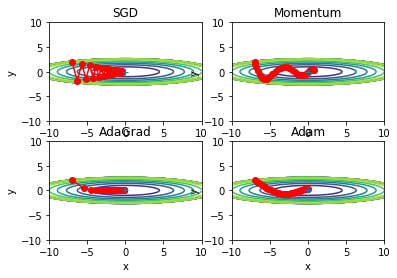

In [1]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
from common.optimizer import *


def f(x, y):
    return x**2 / 20.0 + y**2


def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

===========iteration:0===========
SGD:2.3572017980123126
Momentum:2.4204298573211043
AdaGrad:2.0835926851640583
Adam:2.219704282542268
===========iteration:100===========
SGD:1.5171261596697443
Momentum:0.30059686346264886
AdaGrad:0.10733423404195067
Adam:0.22030280178434877
===========iteration:200===========
SGD:0.8485617459410727
Momentum:0.35680118372800484
AdaGrad:0.1536713974004822
Adam:0.2710500979210047
===========iteration:300===========
SGD:0.5886623475825352
Momentum:0.21367322301856
AdaGrad:0.07843156402377749
Adam:0.1741107879876564
===========iteration:400===========
SGD:0.5362094371986064
Momentum:0.2769269067109637
AdaGrad:0.14176105374727443
Adam:0.181142356548197
===========iteration:500===========
SGD:0.3800155817680161
Momentum:0.16017072192978116
AdaGrad:0.03768662891675124
Adam:0.11492772286566826
===========iteration:600===========
SGD:0.43315753317162736
Momentum:0.21277686773092716
AdaGrad:0.1055721615316358
Adam:0.18122248292269844
===========iteration:700====

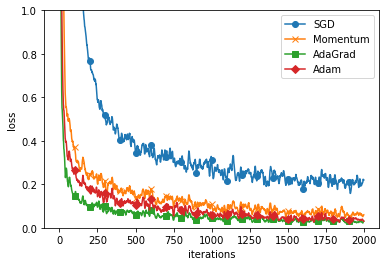

In [2]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

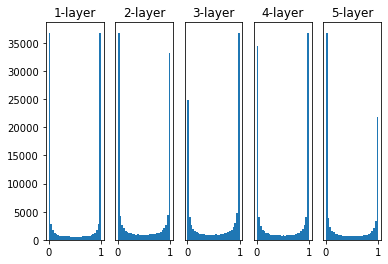

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)
    
input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

===========iteration:0===========
std=0.01:2.302532859379314
Xavier:2.310061694340079
He:2.3214672309601543
===========iteration:100===========
std=0.01:2.3022626861250663
Xavier:2.2576279506860475
He:1.3438926588022846
===========iteration:200===========
std=0.01:2.3018488318153536
Xavier:2.115445765495646
He:0.6931072944103744
===========iteration:300===========
std=0.01:2.304169927371486
Xavier:1.8526862646968218
He:0.6148714707501485
===========iteration:400===========
std=0.01:2.3032090102396987
Xavier:1.2963866943362092
He:0.49368839868131215
===========iteration:500===========
std=0.01:2.3034366496938987
Xavier:0.8103569583036625
He:0.3987589643158035
===========iteration:600===========
std=0.01:2.3020101521579566
Xavier:0.6415529026132842
He:0.39248914929524836
===========iteration:700===========
std=0.01:2.307820278063442
Xavier:0.5801534198982374
He:0.37488494321355836
===========iteration:800===========
std=0.01:2.303224287340519
Xavier:0.43078198939424595
He:0.2645005009107

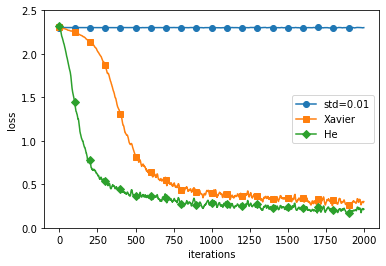

In [4]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

In [5]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100], output_size=10,
                              use_batchnorm=True)

x_batch = x_train[:1]
t_batch = t_train[:1]

grad_backprop = network.gradient(x_batch, t_batch)
grad_numerical = network.numerical_gradient(x_batch, t_batch)


for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:0.0
b1:0.0
gamma1:0.0
beta1:0.0
W2:0.0
b2:0.0
gamma2:0.0
beta2:0.05167770660365889
W3:0.0
b3:1.7990402263745597e-07


============== 1/16 ==============
epoch:0 | 0.117 - 0.116


..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\functions.py:34: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=0)
..\common\layers.py:12: RuntimeWarning: invalid value encountered in less_equal
  self.mask = (x <= 0)


epoch:1 | 0.097 - 0.122
epoch:2 | 0.097 - 0.116
epoch:3 | 0.097 - 0.129
epoch:4 | 0.097 - 0.146
epoch:5 | 0.097 - 0.159
epoch:6 | 0.097 - 0.175
epoch:7 | 0.097 - 0.186
epoch:8 | 0.097 - 0.211
epoch:9 | 0.097 - 0.237
epoch:10 | 0.097 - 0.252
epoch:11 | 0.097 - 0.272
epoch:12 | 0.097 - 0.285
epoch:13 | 0.097 - 0.296
epoch:14 | 0.097 - 0.31
epoch:15 | 0.097 - 0.322
epoch:16 | 0.097 - 0.338
epoch:17 | 0.097 - 0.351
epoch:18 | 0.097 - 0.367


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.371
============== 2/16 ==============
epoch:0 | 0.094 - 0.116
epoch:1 | 0.097 - 0.098
epoch:2 | 0.097 - 0.113
epoch:3 | 0.097 - 0.133
epoch:4 | 0.097 - 0.165
epoch:5 | 0.097 - 0.191
epoch:6 | 0.097 - 0.206
epoch:7 | 0.097 - 0.219
epoch:8 | 0.097 - 0.252
epoch:9 | 0.097 - 0.273
epoch:10 | 0.097 - 0.307
epoch:11 | 0.097 - 0.315
epoch:12 | 0.097 - 0.337
epoch:13 | 0.097 - 0.365
epoch:14 | 0.097 - 0.381
epoch:15 | 0.097 - 0.396
epoch:16 | 0.097 - 0.413
epoch:17 | 0.097 - 0.422


No handles with labels found to put in legend.


epoch:18 | 0.097 - 0.441
epoch:19 | 0.097 - 0.451
============== 3/16 ==============
epoch:0 | 0.094 - 0.081
epoch:1 | 0.367 - 0.119
epoch:2 | 0.516 - 0.163
epoch:3 | 0.573 - 0.235
epoch:4 | 0.643 - 0.28
epoch:5 | 0.686 - 0.309
epoch:6 | 0.76 - 0.348
epoch:7 | 0.782 - 0.384
epoch:8 | 0.829 - 0.401
epoch:9 | 0.866 - 0.448
epoch:10 | 0.894 - 0.471
epoch:11 | 0.916 - 0.49
epoch:12 | 0.932 - 0.51
epoch:13 | 0.941 - 0.532
epoch:14 | 0.949 - 0.54
epoch:15 | 0.964 - 0.561
epoch:16 | 0.969 - 0.588
epoch:17 | 0.972 - 0.608
epoch:18 | 0.979 - 0.621


No handles with labels found to put in legend.


epoch:19 | 0.976 - 0.636
============== 4/16 ==============
epoch:0 | 0.084 - 0.1
epoch:1 | 0.243 - 0.123
epoch:2 | 0.377 - 0.162
epoch:3 | 0.485 - 0.238
epoch:4 | 0.548 - 0.311
epoch:5 | 0.619 - 0.371
epoch:6 | 0.643 - 0.429
epoch:7 | 0.67 - 0.478
epoch:8 | 0.69 - 0.524
epoch:9 | 0.712 - 0.581
epoch:10 | 0.741 - 0.61
epoch:11 | 0.757 - 0.656
epoch:12 | 0.769 - 0.677
epoch:13 | 0.777 - 0.681
epoch:14 | 0.799 - 0.701
epoch:15 | 0.815 - 0.717
epoch:16 | 0.826 - 0.727
epoch:17 | 0.814 - 0.748
epoch:18 | 0.85 - 0.752
epoch:19 | 0.854 - 0.771


No handles with labels found to put in legend.


============== 5/16 ==============
epoch:0 | 0.091 - 0.113
epoch:1 | 0.105 - 0.174
epoch:2 | 0.108 - 0.268
epoch:3 | 0.112 - 0.389
epoch:4 | 0.12 - 0.466
epoch:5 | 0.127 - 0.546
epoch:6 | 0.136 - 0.584
epoch:7 | 0.144 - 0.636
epoch:8 | 0.158 - 0.672
epoch:9 | 0.167 - 0.707
epoch:10 | 0.17 - 0.729
epoch:11 | 0.19 - 0.754
epoch:12 | 0.192 - 0.778
epoch:13 | 0.205 - 0.802
epoch:14 | 0.217 - 0.819
epoch:15 | 0.239 - 0.83
epoch:16 | 0.248 - 0.84
epoch:17 | 0.262 - 0.845


No handles with labels found to put in legend.


epoch:18 | 0.273 - 0.86
epoch:19 | 0.282 - 0.869
============== 6/16 ==============
epoch:0 | 0.09 - 0.075
epoch:1 | 0.119 - 0.183
epoch:2 | 0.125 - 0.427
epoch:3 | 0.116 - 0.582
epoch:4 | 0.125 - 0.647
epoch:5 | 0.134 - 0.717
epoch:6 | 0.145 - 0.772
epoch:7 | 0.148 - 0.805
epoch:8 | 0.148 - 0.83
epoch:9 | 0.118 - 0.85
epoch:10 | 0.137 - 0.862
epoch:11 | 0.125 - 0.873
epoch:12 | 0.133 - 0.883
epoch:13 | 0.116 - 0.901
epoch:14 | 0.116 - 0.913
epoch:15 | 0.116 - 0.915
epoch:16 | 0.116 - 0.926
epoch:17 | 0.116 - 0.934
epoch:18 | 0.116 - 0.941
epoch:19 | 0.116 - 0.947


No handles with labels found to put in legend.


============== 7/16 ==============
epoch:0 | 0.105 - 0.131
epoch:1 | 0.105 - 0.288
epoch:2 | 0.117 - 0.561
epoch:3 | 0.105 - 0.662
epoch:4 | 0.105 - 0.726
epoch:5 | 0.117 - 0.775
epoch:6 | 0.117 - 0.808
epoch:7 | 0.117 - 0.845
epoch:8 | 0.116 - 0.871
epoch:9 | 0.116 - 0.899
epoch:10 | 0.116 - 0.913
epoch:11 | 0.116 - 0.931
epoch:12 | 0.116 - 0.943
epoch:13 | 0.116 - 0.958
epoch:14 | 0.116 - 0.965
epoch:15 | 0.116 - 0.97
epoch:16 | 0.116 - 0.976
epoch:17 | 0.116 - 0.984
epoch:18 | 0.117 - 0.985
epoch:19 | 0.116 - 0.987

No handles with labels found to put in legend.



============== 8/16 ==============
epoch:0 | 0.1 - 0.097
epoch:1 | 0.117 - 0.52
epoch:2 | 0.117 - 0.746
epoch:3 | 0.116 - 0.84
epoch:4 | 0.116 - 0.878
epoch:5 | 0.116 - 0.915
epoch:6 | 0.116 - 0.936
epoch:7 | 0.116 - 0.966
epoch:8 | 0.116 - 0.977
epoch:9 | 0.117 - 0.985
epoch:10 | 0.117 - 0.989
epoch:11 | 0.117 - 0.991
epoch:12 | 0.117 - 0.994
epoch:13 | 0.117 - 0.995
epoch:14 | 0.117 - 0.996
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.996
epoch:17 | 0.117 - 0.997


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.998
epoch:19 | 0.117 - 0.998
============== 9/16 ==============
epoch:0 | 0.116 - 0.148
epoch:1 | 0.116 - 0.389
epoch:2 | 0.116 - 0.712
epoch:3 | 0.116 - 0.757
epoch:4 | 0.117 - 0.845
epoch:5 | 0.116 - 0.889
epoch:6 | 0.116 - 0.934
epoch:7 | 0.116 - 0.965
epoch:8 | 0.117 - 0.981
epoch:9 | 0.116 - 0.986
epoch:10 | 0.116 - 0.996
epoch:11 | 0.117 - 0.996
epoch:12 | 0.116 - 0.997
epoch:13 | 0.117 - 0.998
epoch:14 | 0.116 - 0.998
epoch:15 | 0.117 - 1.0
epoch:16 | 0.116 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 10/16 ==============
epoch:0 | 0.097 - 0.107
epoch:1 | 0.117 - 0.453
epoch:2 | 0.117 - 0.624
epoch:3 | 0.117 - 0.631
epoch:4 | 0.117 - 0.673
epoch:5 | 0.117 - 0.687
epoch:6 | 0.117 - 0.697
epoch:7 | 0.117 - 0.747
epoch:8 | 0.117 - 0.782
epoch:9 | 0.117 - 0.785
epoch:10 | 0.117 - 0.783
epoch:11 | 0.117 - 0.789
epoch:12 | 0.117 - 0.791
epoch:13 | 0.116 - 0.893
epoch:14 | 0.116 - 0.869
epoch:15 | 0.117 - 0.876
epoch:16 | 0.117 - 0.896
epoch:17 | 0.117 - 0.898
epoch:18 | 0.117 - 0.896


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.898
============== 11/16 ==============
epoch:0 | 0.116 - 0.172
epoch:1 | 0.117 - 0.531
epoch:2 | 0.117 - 0.639
epoch:3 | 0.117 - 0.732
epoch:4 | 0.117 - 0.765
epoch:5 | 0.117 - 0.903
epoch:6 | 0.117 - 0.802
epoch:7 | 0.117 - 0.901
epoch:8 | 0.117 - 0.955
epoch:9 | 0.117 - 0.938
epoch:10 | 0.117 - 0.985
epoch:11 | 0.117 - 0.984
epoch:12 | 0.117 - 0.992
epoch:13 | 0.117 - 0.991
epoch:14 | 0.117 - 0.977
epoch:15 | 0.117 - 0.995
epoch:16 | 0.117 - 0.983
epoch:17 | 0.117 - 0.986
epoch:18 | 0.117 - 0.972


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.995
============== 12/16 ==============
epoch:0 | 0.1 - 0.221
epoch:1 | 0.097 - 0.449
epoch:2 | 0.117 - 0.541
epoch:3 | 0.117 - 0.681
epoch:4 | 0.117 - 0.692
epoch:5 | 0.117 - 0.742
epoch:6 | 0.117 - 0.77
epoch:7 | 0.117 - 0.634
epoch:8 | 0.117 - 0.784
epoch:9 | 0.117 - 0.728
epoch:10 | 0.116 - 0.786
epoch:11 | 0.117 - 0.767
epoch:12 | 0.117 - 0.78
epoch:13 | 0.117 - 0.789
epoch:14 | 0.117 - 0.771
epoch:15 | 0.117 - 0.777
epoch:16 | 0.117 - 0.792
epoch:17 | 0.117 - 0.796
epoch:18 | 0.117 - 0.894
epoch:19 | 0.117 - 0.854


No handles with labels found to put in legend.


============== 13/16 ==============
epoch:0 | 0.117 - 0.248
epoch:1 | 0.117 - 0.508
epoch:2 | 0.117 - 0.506
epoch:3 | 0.117 - 0.63
epoch:4 | 0.117 - 0.67
epoch:5 | 0.117 - 0.672
epoch:6 | 0.117 - 0.677
epoch:7 | 0.117 - 0.655
epoch:8 | 0.117 - 0.691
epoch:9 | 0.117 - 0.698
epoch:10 | 0.117 - 0.694
epoch:11 | 0.117 - 0.602
epoch:12 | 0.117 - 0.704
epoch:13 | 0.117 - 0.709
epoch:14 | 0.117 - 0.707
epoch:15 | 0.117 - 0.706
epoch:16 | 0.117 - 0.708
epoch:17 | 0.117 - 0.709


No handles with labels found to put in legend.


epoch:18 | 0.117 - 0.711
epoch:19 | 0.117 - 0.709
============== 14/16 ==============
epoch:0 | 0.1 - 0.182
epoch:1 | 0.117 - 0.491
epoch:2 | 0.117 - 0.383
epoch:3 | 0.117 - 0.556
epoch:4 | 0.117 - 0.572
epoch:5 | 0.117 - 0.602
epoch:6 | 0.117 - 0.58
epoch:7 | 0.117 - 0.604
epoch:8 | 0.117 - 0.603
epoch:9 | 0.117 - 0.609
epoch:10 | 0.117 - 0.608
epoch:11 | 0.117 - 0.616
epoch:12 | 0.117 - 0.619
epoch:13 | 0.117 - 0.612
epoch:14 | 0.117 - 0.69
epoch:15 | 0.117 - 0.703
epoch:16 | 0.117 - 0.686
epoch:17 | 0.117 - 0.703
epoch:18 | 0.117 - 0.648


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.713
============== 15/16 ==============
epoch:0 | 0.116 - 0.132
epoch:1 | 0.093 - 0.304
epoch:2 | 0.116 - 0.385
epoch:3 | 0.116 - 0.406
epoch:4 | 0.117 - 0.406
epoch:5 | 0.117 - 0.41
epoch:6 | 0.117 - 0.409
epoch:7 | 0.117 - 0.416
epoch:8 | 0.117 - 0.498
epoch:9 | 0.117 - 0.485
epoch:10 | 0.117 - 0.51
epoch:11 | 0.117 - 0.492
epoch:12 | 0.117 - 0.514
epoch:13 | 0.117 - 0.496
epoch:14 | 0.117 - 0.507
epoch:15 | 0.116 - 0.508
epoch:16 | 0.116 - 0.519
epoch:17 | 0.116 - 0.513
epoch:18 | 0.117 - 0.517


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.51
============== 16/16 ==============
epoch:0 | 0.116 - 0.282
epoch:1 | 0.097 - 0.216
epoch:2 | 0.116 - 0.289
epoch:3 | 0.116 - 0.297
epoch:4 | 0.116 - 0.298
epoch:5 | 0.116 - 0.314
epoch:6 | 0.116 - 0.381
epoch:7 | 0.116 - 0.413
epoch:8 | 0.117 - 0.412
epoch:9 | 0.116 - 0.422
epoch:10 | 0.117 - 0.413
epoch:11 | 0.117 - 0.424
epoch:12 | 0.117 - 0.443
epoch:13 | 0.116 - 0.487
epoch:14 | 0.117 - 0.393
epoch:15 | 0.117 - 0.461
epoch:16 | 0.117 - 0.512
epoch:17 | 0.117 - 0.51
epoch:18 | 0.117 - 0.513
epoch:19 | 0.117 - 0.512


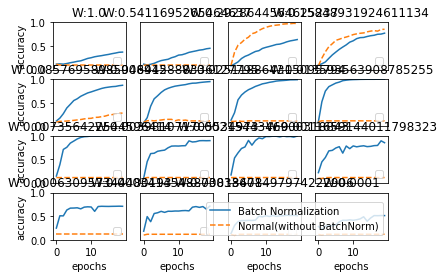

In [6]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

epoch:0, train acc:0.13, test acc:0.1058
epoch:1, train acc:0.12666666666666668, test acc:0.1091
epoch:2, train acc:0.14, test acc:0.1135
epoch:3, train acc:0.15666666666666668, test acc:0.1176
epoch:4, train acc:0.17, test acc:0.1266
epoch:5, train acc:0.18333333333333332, test acc:0.1372
epoch:6, train acc:0.21, test acc:0.1461
epoch:7, train acc:0.23, test acc:0.1527
epoch:8, train acc:0.25666666666666665, test acc:0.1694
epoch:9, train acc:0.26666666666666666, test acc:0.1791
epoch:10, train acc:0.29, test acc:0.1966
epoch:11, train acc:0.31666666666666665, test acc:0.2142
epoch:12, train acc:0.33666666666666667, test acc:0.2228
epoch:13, train acc:0.3466666666666667, test acc:0.2334
epoch:14, train acc:0.36, test acc:0.25
epoch:15, train acc:0.38, test acc:0.2587
epoch:16, train acc:0.4066666666666667, test acc:0.2697
epoch:17, train acc:0.43, test acc:0.2858
epoch:18, train acc:0.46, test acc:0.303
epoch:19, train acc:0.4866666666666667, test acc:0.3261
epoch:20, train acc:0.5033

epoch:159, train acc:0.8866666666666667, test acc:0.7084
epoch:160, train acc:0.89, test acc:0.7139
epoch:161, train acc:0.8866666666666667, test acc:0.7024
epoch:162, train acc:0.8966666666666666, test acc:0.7125
epoch:163, train acc:0.8966666666666666, test acc:0.7175
epoch:164, train acc:0.89, test acc:0.7205
epoch:165, train acc:0.8933333333333333, test acc:0.7151
epoch:166, train acc:0.8866666666666667, test acc:0.7089
epoch:167, train acc:0.8966666666666666, test acc:0.7063
epoch:168, train acc:0.89, test acc:0.71
epoch:169, train acc:0.89, test acc:0.7104
epoch:170, train acc:0.89, test acc:0.704
epoch:171, train acc:0.89, test acc:0.7104
epoch:172, train acc:0.88, test acc:0.6978
epoch:173, train acc:0.89, test acc:0.7063
epoch:174, train acc:0.8966666666666666, test acc:0.7085
epoch:175, train acc:0.8966666666666666, test acc:0.7133
epoch:176, train acc:0.89, test acc:0.7061
epoch:177, train acc:0.8866666666666667, test acc:0.6972
epoch:178, train acc:0.89, test acc:0.6998
epo

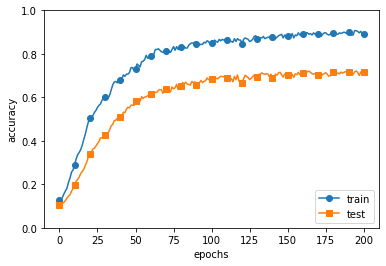

In [7]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.2899585819204775
=== epoch:1, train acc:0.08, test acc:0.0883 ===
train loss:2.3139126951945452
train loss:2.330988230542681
train loss:2.294197100445376
=== epoch:2, train acc:0.08333333333333333, test acc:0.0898 ===
train loss:2.313892094244136
train loss:2.3177314683439345
train loss:2.31529014244209
=== epoch:3, train acc:0.08666666666666667, test acc:0.0915 ===
train loss:2.322487009717435
train loss:2.3158539199520387
train loss:2.298666253631286
=== epoch:4, train acc:0.09333333333333334, test acc:0.0946 ===
train loss:2.3053028950942682
train loss:2.3102779358759786
train loss:2.2984792368084292
=== epoch:5, train acc:0.09666666666666666, test acc:0.0971 ===
train loss:2.2967779208088652
train loss:2.317007162199518
train loss:2.3036787892936363
=== epoch:6, train acc:0.10333333333333333, test acc:0.0997 ===
train loss:2.3294119593557316
train loss:2.3011694009416135
train loss:2.3005991941475497
=== epoch:7, train acc:0.11333333333333333, test acc:0.1046 ===
train

=== epoch:57, train acc:0.27666666666666667, test acc:0.2278 ===
train loss:2.240480476187626
train loss:2.253626324297076
train loss:2.2506061097966086
=== epoch:58, train acc:0.28, test acc:0.2299 ===
train loss:2.2431177637524518
train loss:2.2514413268358258
train loss:2.249707168472797
=== epoch:59, train acc:0.2833333333333333, test acc:0.2294 ===
train loss:2.2210807613567813
train loss:2.2629101834200394
train loss:2.2365001020731983
=== epoch:60, train acc:0.2833333333333333, test acc:0.2309 ===
train loss:2.249446112821806
train loss:2.245058206888252
train loss:2.223542635230247
=== epoch:61, train acc:0.2833333333333333, test acc:0.2317 ===
train loss:2.274838722371687
train loss:2.2592662183495653
train loss:2.235814244009129
=== epoch:62, train acc:0.29, test acc:0.237 ===
train loss:2.243753287736494
train loss:2.255518842340755
train loss:2.235728410056631
=== epoch:63, train acc:0.29, test acc:0.2359 ===
train loss:2.2271648598201503
train loss:2.2407063150573974
train

=== epoch:113, train acc:0.34, test acc:0.2865 ===
train loss:2.1393520500737377
train loss:2.154100559006715
train loss:2.1463018284867843
=== epoch:114, train acc:0.34, test acc:0.2869 ===
train loss:2.150510033837729
train loss:2.141380761704073
train loss:2.1582402369278593
=== epoch:115, train acc:0.3433333333333333, test acc:0.2869 ===
train loss:2.0958005242378643
train loss:2.0846304418038195
train loss:2.1605403947496655
=== epoch:116, train acc:0.33666666666666667, test acc:0.2863 ===
train loss:2.133534084773277
train loss:2.147043704362488
train loss:2.1241916388667437
=== epoch:117, train acc:0.3433333333333333, test acc:0.2867 ===
train loss:2.1113280417658906
train loss:2.144539822868844
train loss:2.157911899383414
=== epoch:118, train acc:0.35333333333333333, test acc:0.2877 ===
train loss:2.1659794548805964
train loss:2.13813925194411
train loss:2.144234634112743
=== epoch:119, train acc:0.36, test acc:0.2895 ===
train loss:2.107082147142445
train loss:2.1131687343823

=== epoch:168, train acc:0.38, test acc:0.3232 ===
train loss:1.926534023096145
train loss:1.886276621588819
train loss:1.8796517027945712
=== epoch:169, train acc:0.38, test acc:0.3235 ===
train loss:1.9427696784172954
train loss:1.8117988107611072
train loss:1.8821331289106893
=== epoch:170, train acc:0.38, test acc:0.3222 ===
train loss:1.928562100175336
train loss:1.913583263518566
train loss:1.9093221413673422
=== epoch:171, train acc:0.3933333333333333, test acc:0.328 ===
train loss:1.9540643752522475
train loss:1.8606462615787405
train loss:1.8549949256378726
=== epoch:172, train acc:0.4, test acc:0.3307 ===
train loss:1.832024909688077
train loss:1.8227904851490253
train loss:1.8710622466954776
=== epoch:173, train acc:0.4033333333333333, test acc:0.3328 ===
train loss:1.8491107917474272
train loss:1.8162352909903805
train loss:1.8488823960071996
=== epoch:174, train acc:0.4066666666666667, test acc:0.3327 ===
train loss:1.8286930642159218
train loss:1.888957186850456
train los

=== epoch:223, train acc:0.46, test acc:0.3701 ===
train loss:1.4333623322805287
train loss:1.4577943994675773
train loss:1.498349436399684
=== epoch:224, train acc:0.4533333333333333, test acc:0.3659 ===
train loss:1.4291509126322655
train loss:1.6327394496771293
train loss:1.55616058305515
=== epoch:225, train acc:0.4633333333333333, test acc:0.3705 ===
train loss:1.436735151962658
train loss:1.4886856397246138
train loss:1.5914443512246528
=== epoch:226, train acc:0.46, test acc:0.3703 ===
train loss:1.5160467212610775
train loss:1.5252464328825601
train loss:1.5034005155630468
=== epoch:227, train acc:0.45666666666666667, test acc:0.3717 ===
train loss:1.4749823150416304
train loss:1.4345474176969075
train loss:1.3885097380486142
=== epoch:228, train acc:0.4633333333333333, test acc:0.3716 ===
train loss:1.6020850377082427
train loss:1.4259704858946762
train loss:1.5158160060063737
=== epoch:229, train acc:0.47, test acc:0.3777 ===
train loss:1.4623879850160364
train loss:1.5807393

=== epoch:278, train acc:0.5666666666666667, test acc:0.4584 ===
train loss:1.134287645075326
train loss:1.3028585207739747
train loss:1.308741955357601
=== epoch:279, train acc:0.5666666666666667, test acc:0.4563 ===
train loss:1.238205133990174
train loss:1.215191067794358
train loss:1.2207306718963598
=== epoch:280, train acc:0.5666666666666667, test acc:0.4563 ===
train loss:1.1818545616093328
train loss:1.229978641090041
train loss:1.1061389250014444
=== epoch:281, train acc:0.5766666666666667, test acc:0.4618 ===
train loss:1.083309795023157
train loss:1.2558037008188812
train loss:1.2917014553594048
=== epoch:282, train acc:0.5766666666666667, test acc:0.4663 ===
train loss:1.2166950296867745
train loss:1.0640362087437416
train loss:1.1872210281371136
=== epoch:283, train acc:0.58, test acc:0.4636 ===
train loss:1.1855693483925764
train loss:1.1525225119511602
train loss:1.1341878755011137
=== epoch:284, train acc:0.5733333333333334, test acc:0.465 ===
train loss:1.1429333260855

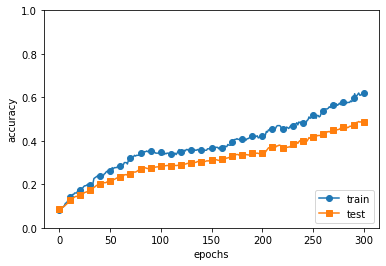

In [8]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [9]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

val acc:0.76 | lr:0.009148199165414608, weight decay:8.662597697273085e-06
val acc:0.13 | lr:0.0006936255480032815, weight decay:6.99591505427695e-05
val acc:0.07 | lr:7.50374092510703e-05, weight decay:2.136385282541291e-08
val acc:0.12 | lr:6.44737803725635e-06, weight decay:1.0755551923890743e-05
val acc:0.14 | lr:0.0005620055256653147, weight decay:2.057016177290107e-07
val acc:0.08 | lr:4.1881631002605094e-05, weight decay:5.694119296522235e-06
val acc:0.75 | lr:0.008057119100822125, weight decay:1.9857873177979526e-08
val acc:0.15 | lr:1.2216926461113917e-05, weight decay:2.3574866759128478e-08
val acc:0.11 | lr:1.0411642947497446e-06, weight decay:1.0226508484864606e-05
val acc:0.11 | lr:0.0003217100468845136, weight decay:1.3183528730543645e-07
val acc:0.23 | lr:0.00073669877727852, weight decay:6.399609300076623e-06
val acc:0.11 | lr:1.274647565262278e-05, weight decay:2.2693366390506056e-06
val acc:0.07 | lr:0.00020793235100092378, weight decay:1.6499231574945383e-05
val acc: